In [2]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xGPR

if "notebooks" in os.getcwd():
    current_dir = os.getcwd()

os.chdir(os.path.join("..", "results"))
with open("exact_quad_overlapped_pro.pk", "rb") as fhandle:
    final_model = pickle.load(fhandle)
    final_model.device = "cpu"
with open("exact_quad_overlapped_pro.pk", "wb") as fhandle:
    pickle.dump(final_model, fhandle)
os.chdir(current_dir)

In [4]:
beta = np.exp(final_model.get_hyperparams()[1])
lambda_ = np.exp(final_model.get_hyperparams()[0])
weight_mean = final_model.weights * beta

(0.0, 50.0)

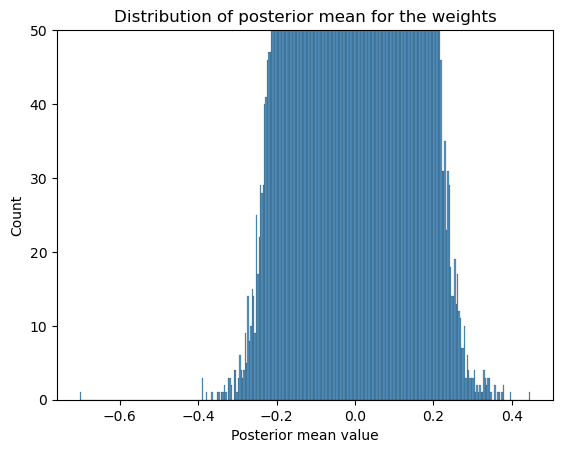

In [8]:
sns.histplot(weight_mean)
plt.title("Distribution of posterior mean for the weights")
plt.xlabel("Posterior mean value")
plt.ylim(0,50)

In [9]:
var_ex = final_model.var.u_mat * final_model.var.inv_eig[None,:]
var_ex2 = (1 - (final_model.var.u_mat**2).sum(axis=1)) / lambda_**2

In [10]:
var = lambda_**2 * beta**2 * ((var_ex * final_model.var.u_mat).sum(axis=1) + var_ex2)
stdev = np.sqrt(var)

In [11]:
high_idx = weight_mean > 0
low_idx = weight_mean < 0
print(((weight_mean[high_idx] - 1.96 * stdev[high_idx]) > 0).sum())
print(((weight_mean[low_idx] + 1.96 * stdev[low_idx]) < 0).sum())

0
0


(0.0, 50.0)

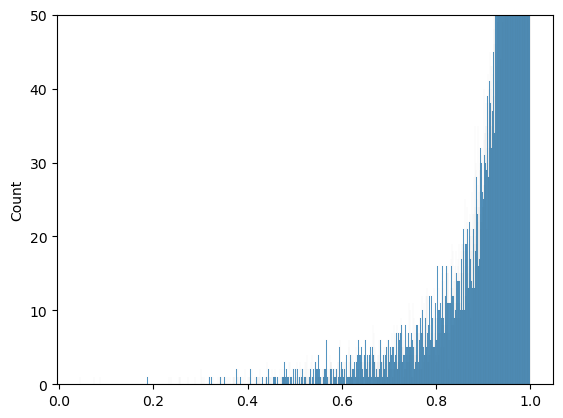

In [17]:
sns.histplot(stdev)
plt.ylim(0,50)

In [13]:
imp_high_idx = np.where((weight_mean - 1.440 * stdev) > 0)[0]
imp_low_idx = np.where((weight_mean + 1.440 * stdev) < 0)[0]

key_stdev_idx = np.where(stdev < 0.04)[0]

In [15]:
imp_high_idx.shape[0] + imp_low_idx.shape[0]

0

In [127]:
imp_low_idx

(array([201929]),)

In [131]:
x_example = np.load(os.path.join("..", "..", "xdata", "BSS00004_count_matrix_pro.npy"))

In [165]:
feature_key = []

num_feats, out_col = 634, 0
for i in range(num_feats):
    feature_key.append((i,None))
    for j in range(i, num_feats):
        feature_key.append((i,j))
        
feature_key.append((-1,-1))

In [166]:
feature_key[162590]

(355, None)

In [187]:
[feature_key[f] for f in imp_high_idx.tolist()]

[(9, None),
 (38, None),
 (81, None),
 (90, None),
 (160, None),
 (249, None),
 (284, None),
 (304, None),
 (309, None),
 (322, None),
 (355, None),
 (363, None),
 (367, None),
 (402, None),
 (477, None),
 (478, None),
 (511, None),
 (520, None),
 (545, None),
 (548, None),
 (556, None),
 (608, None),
 (612, None)]

In [146]:
best_cols

[355, 478, 520, 545, 612]